<a href="https://colab.research.google.com/github/younghwaya/test/blob/master/test_binary_new_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn import metrics

SR = 16000

In [ ]:
import os
import math
import random

def train_test_split(Normal_parent_dir, Fault1_parent_dir, Fault2_parent_dir, Fault7_parent_dir, Train_Test_ratio=0.1):
    Normal_sub_dir_list = os.listdir(Normal_parent_dir)
    Fault1_sub_dir_list = os.listdir(Fault1_parent_dir)
    Fault2_sub_dir_list = os.listdir(Fault2_parent_dir)
    Fault7_sub_dir_list = os.listdir(Fault7_parent_dir)

    random.shuffle(Normal_sub_dir_list)
    random.shuffle(Fault1_sub_dir_list)
    random.shuffle(Fault2_sub_dir_list)
    random.shuffle(Fault7_sub_dir_list)

    Normal_sub_dir_num = len(Normal_sub_dir_list)
    Fault1_sub_dir_num = len(Fault1_sub_dir_list)
    Fault2_sub_dir_num = len(Fault2_sub_dir_list)
    Fault7_sub_dir_num = len(Fault7_sub_dir_list)

    Normal_test_split_num = math.floor(Train_Test_ratio * Normal_sub_dir_num)
    Fault1_test_split_num = math.floor(Train_Test_ratio * Fault1_sub_dir_num)
    Fault2_test_split_num = math.floor(Train_Test_ratio * Fault2_sub_dir_num)
    Fault7_test_split_num = math.floor(Train_Test_ratio * Fault7_sub_dir_num)

    if Normal_test_split_num < 1:
      Normal_test_split_num = 1
    if Fault1_test_split_num < 1:
      Fault1_test_split_num = 1
    if Fault2_test_split_num < 1:
      Fault2_test_split_num = 1
    if Fault7_test_split_num < 1:
      Fault7_test_split_num = 1

    # Normal_test_dir_list = Normal_sub_dir_list[:Normal_test_split_num]
    # Normal_train_dir_list = Normal_sub_dir_list[Normal_test_split_num:]
    Normal_test_dir_list = Normal_sub_dir_list[:3]
    Normal_train_dir_list = Normal_sub_dir_list[3:]
    Fault1_test_dir_list = Fault1_sub_dir_list[:Fault1_test_split_num]
    Fault1_train_dir_list = Fault1_sub_dir_list[Fault1_test_split_num:]
    Fault2_test_dir_list = Fault2_sub_dir_list[:Fault2_test_split_num]
    Fault2_train_dir_list = Fault2_sub_dir_list[Fault2_test_split_num:]
    Fault7_test_dir_list = Fault7_sub_dir_list[:Fault7_test_split_num]
    Fault7_train_dir_list = Fault7_sub_dir_list[Fault7_test_split_num:]

    print(Normal_train_dir_list, Normal_test_dir_list)
    print(Fault1_train_dir_list, Fault1_test_dir_list)
    print(Fault2_train_dir_list, Fault2_test_dir_list)
    print(Fault7_train_dir_list, Fault7_test_dir_list)

    return Normal_train_dir_list, Normal_test_dir_list, Fault1_train_dir_list, Fault1_test_dir_list, Fault2_train_dir_list, Fault2_test_dir_list, Fault7_train_dir_list, Fault7_test_dir_list

In [ ]:
import glob
import librosa
from tqdm import tqdm

def dataset_read(parent_dir, sub_dirs, file_ext="*wav", SR=16000):
    audio_array = []
    for folder in tqdm(sub_dirs):
        audio = []
        for fn in glob.glob(os.path.join(parent_dir, folder, file_ext)):
            y = librosa.load(fn, sr=SR)[0]
            y = y[0:SR*7]
            audio.append(y)
        # audio_cqt = cqt(audio)
        # audio_array.append(audio_cqt)
        audio_array.append(audio)
    return audio_array

In [ ]:
def train_test_dataset(Normal_parent_dir, Fault1_parent_dir, Fault2_parent_dir, Fault7_parent_dir, Train_Test_ratio=0.1, SR=16000):
    Normal_train_dir_list, Normal_test_dir_list, Fault1_train_dir_list, Fault1_test_dir_list, Fault2_train_dir_list, Fault2_test_dir_list, Fault7_train_dir_list, Fault7_test_dir_list = train_test_split(Normal_parent_dir, Fault1_parent_dir, Fault2_parent_dir, Fault7_parent_dir, Train_Test_ratio)
    Normal_train_data = dataset_read(Normal_parent_dir, Normal_train_dir_list, SR=SR)
    Normal_test_data = dataset_read(Normal_parent_dir, Normal_test_dir_list, SR=SR)
    Fault1_train_data = dataset_read(Fault1_parent_dir, Fault1_train_dir_list, SR=SR)
    Fault1_test_data = dataset_read(Fault1_parent_dir, Fault1_test_dir_list, SR=SR)
    Fault2_train_data = dataset_read(Fault2_parent_dir, Fault2_train_dir_list, SR=SR)
    Fault2_test_data = dataset_read(Fault2_parent_dir, Fault2_test_dir_list, SR=SR)
    Fault7_train_data = dataset_read(Fault7_parent_dir, Fault7_train_dir_list, SR=SR)
    Fault7_test_data = dataset_read(Fault7_parent_dir, Fault7_test_dir_list, SR=SR)

    return Normal_train_data, Normal_test_data, Fault1_train_data, Fault1_test_data, Fault2_train_data, Fault2_test_data, Fault7_train_data, Fault7_test_data

In [ ]:
Normal_parent_dir = 'Data/Normal'
Fault1_parent_dir = 'Data/Fault1'
Fault2_parent_dir = 'Data/Fault2'
Fault7_parent_dir = 'Data/Fault7'

In [ ]:
Normal_train_dataset, Normal_test_dataset, Fault1_train_dataset, Fault1_test_dataset, Fault2_train_dataset, Fault2_test_dataset, Fault7_train_dataset, Fault7_test_dataset = train_test_dataset(Normal_parent_dir, Fault1_parent_dir, Fault2_parent_dir, Fault7_parent_dir, Train_Test_ratio=0.1, SR=16000)
print(np.array(Normal_train_dataset).shape, np.array(Normal_test_dataset).shape)
print(np.array(Fault1_train_dataset).shape, np.array(Fault1_test_dataset).shape)
print(np.array(Fault2_train_dataset).shape, np.array(Fault2_test_dataset).shape)
print(np.array(Fault7_train_dataset).shape, np.array(Fault7_test_dataset).shape)

['087', '2-013', '2-021', '099', '2-009', '096', '2-023', '091', '2-016', '2-014', '097', '098', '2-015', '2-025', '2-024', '2-006', '2-020', '2-018', '2-003', '2-004', '089', '2-011', '2-027', '088', '2-002', '094', '086', '2-001', '085', '084', '081', '092', '2-028', '083', '2-007', '2-017', '2-026', '2-030', '2-012', '2-022'] ['093', '2-005', '2-008']
['3-013', '3-002', '028', '3-012', '038', '036', '3-003', '037', '3-005', '032', '014', '067', '3-004', '001'] ['040']
['066', '3-007', '074', '047', '039', '070', '015', '3-006', '049', '3-008', '042', '016'] ['3-009']
['002', '017', '022', '011', '004', '033', '058', '059', '061', '064'] ['045']


100%|██████████| 1/1 [00:09<00:00,  9.40s/it]


(40, 50, 112000) (3, 50, 112000)
(14, 50, 112000) (1, 50, 112000)
(12, 50, 112000) (1, 50, 112000)
(10, 50, 112000) (1, 50, 112000)


In [ ]:
def extend_data(append_data):
    dataset = []

    for data in append_data:
        dataset.extend(data)
    
    return dataset

In [ ]:
Normal_train_dataset = extend_data(Normal_train_dataset)
Normal_train_dataset = np.array(Normal_train_dataset)
Normal_test_dataset = extend_data(Normal_test_dataset)
Normal_test_dataset = np.array(Normal_test_dataset)
Fault1_train_dataset = extend_data(Fault1_train_dataset)
Fault1_train_dataset = np.array(Fault1_train_dataset)
Fault1_test_dataset = extend_data(Fault1_test_dataset)
Fault1_test_dataset = np.array(Fault1_test_dataset)
Fault2_train_dataset = extend_data(Fault2_train_dataset)
Fault2_train_dataset = np.array(Fault2_train_dataset)
Fault2_test_dataset = extend_data(Fault2_test_dataset)
Fault2_test_dataset = np.array(Fault2_test_dataset)
Fault7_train_dataset = extend_data(Fault7_train_dataset)
Fault7_train_dataset = np.array(Fault7_train_dataset)
Fault7_test_dataset = extend_data(Fault7_test_dataset)
Fault7_test_dataset = np.array(Fault7_test_dataset)

train_label_0 = np.full(shape=(len(Normal_train_dataset),), fill_value=0, dtype=np.int16)
train_label_1 = np.full(shape=(len(Fault1_train_dataset),), fill_value=1, dtype=np.int16)
train_label_2 = np.full(shape=(len(Fault2_train_dataset),), fill_value=1, dtype=np.int16)
train_label_7 = np.full(shape=(len(Fault7_train_dataset),), fill_value=1, dtype=np.int16)

test_label_0 = np.full(shape=(len(Normal_test_dataset),), fill_value=0, dtype=np.int16)
test_label_1 = np.full(shape=(len(Fault1_test_dataset),), fill_value=1, dtype=np.int16)
test_label_2 = np.full(shape=(len(Fault2_test_dataset),), fill_value=1, dtype=np.int16)
test_label_7 = np.full(shape=(len(Fault7_test_dataset),), fill_value=1, dtype=np.int16)

print(Normal_train_dataset.shape, Normal_test_dataset.shape)
print(Fault1_train_dataset.shape, Fault1_test_dataset.shape)
print(Fault2_train_dataset.shape, Fault2_test_dataset.shape)
print(Fault7_train_dataset.shape, Fault7_test_dataset.shape)

(2000, 112000) (150, 112000)
(700, 112000) (50, 112000)
(600, 112000) (50, 112000)
(500, 112000) (50, 112000)


In [ ]:
train_data = np.concatenate((Normal_train_dataset, Fault1_train_dataset, Fault2_train_dataset, Fault7_train_dataset))
test_data = np.concatenate((Normal_test_dataset, Fault1_test_dataset, Fault2_test_dataset, Fault7_test_dataset))

train_label = np.concatenate((train_label_0, train_label_1, train_label_2, train_label_7))
test_label = np.concatenate((test_label_0, test_label_1, test_label_2, test_label_7))

print(train_data.shape, test_data.shape)
print(train_label.shape, test_label.shape)

(3800, 112000) (300, 112000)
(3800,) (300,)


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import optimizers, losses

sgd = optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True, decay=1e-6)

def model_build(height, width, channel, Total_Class_Num=4):
  model = Sequential()

  input = Input(shape=(height, width, channel))

  output = Conv2D(32, 3, strides=1, padding='same', activation='relu')(input)
  output = BatchNormalization()(output)
  output = Conv2D(32, 3, strides=1, padding='same', activation='relu')(output)
  output = BatchNormalization()(output)
  output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)

  output = Conv2D(64, 3, strides=1, padding='same', activation='relu')(output)
  output = BatchNormalization()(output)
  output = Conv2D(64, 3, strides=1, padding='same', activation='relu')(output)
  output = BatchNormalization()(output)
  output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)

  output = Conv2D(128, 3, strides=1, padding='same', activation='relu')(output)
  output = BatchNormalization()(output)
  output = Conv2D(128, 3, strides=1, padding='same', activation='relu')(output)
  output = BatchNormalization()(output)
  output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)

  output = Conv2D(256, 3, strides=1, padding='same', activation='relu')(output)
  output = BatchNormalization()(output)
  output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)

  output = Flatten()(output)

  output = Dense(1024, activation='relu')(output)
  output = BatchNormalization()(output)
  output = Dense(128, activation='relu')(output)
  output = BatchNormalization()(output)
  if Total_Class_Num==4:
        output = Dense(Total_Class_Num, activation='softmax')(output)
        loss_func = losses.CategoricalCrossentropy()
  if Total_Class_Num==3:
        output = Dense(Total_Class_Num, activation='softmax')(output)
        loss_func = losses.CategoricalCrossentropy()
  elif Total_Class_Num==2:
        output = Dense(Total_Class_Num, activation='sigmoid')(output)
        loss_func = losses.BinaryCrossentropy()

  model = Model(inputs=[input], outputs=output)
  model.compile(optimizer='adam',
                loss=loss_func,
                metrics=['acc'])

  return model

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_graph(history):
    y_loss = history.history['loss']
    y_vloss = history.history['val_loss']

    loss_len = np.arange(len(y_loss))

    plt.plot(loss_len, y_loss, marker='.', c='blue', label="Train-set Loss")
    plt.plot(loss_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
    
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

In [ ]:
def plot_acc_graph(history):
    y_acc = history.history['acc']
    y_vacc = history.history['val_acc']

    acc_len = np.arange(len(y_acc))

    plt.plot(acc_len, y_acc, marker='.', c='blue', label="Train-set Accuracy")
    plt.plot(acc_len, y_vacc, marker='.', c='red', label="Validation-set Accuracy")
    
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

In [ ]:
def cqt(data, sr=16000):
    audio_cqt = []

    for y in tqdm(data):
        ret = librosa.cqt(y, sr, hop_length=1024, n_bins=24*7, bins_per_octave=24)
        ret = np.abs(ret)
        ret = librosa.power_to_db(ret, ref=np.max)
        audio_cqt.append(ret)

    cqt_np = np.array(audio_cqt, np.float32)
    cqt_array = np.expand_dims(cqt_np, -1)

    return cqt_array

In [ ]:
train_data_cqt = cqt(train_data)
test_data_cqt = cqt(test_data)

print(train_data_cqt.shape, test_data_cqt.shape)

100%|██████████| 300/300 [00:24<00:00, 12.24it/s]

(3800, 168, 110, 1) (300, 168, 110, 1)


In [ ]:
from sklearn.model_selection import train_test_split

train_data_cqt_train, train_data_cqt_val, train_label_cqt_train, train_label_cqt_val = train_test_split(train_data_cqt, train_label, shuffle=True, test_size=0.1)

In [ ]:
train_cqt_inst_cat = to_categorical(train_label_cqt_train)

val_cqt_inst_cat = to_categorical(train_label_cqt_val)

test_inst_cat = to_categorical(test_label)

_, h_cqt, w_cqt, c_cqt = train_data_cqt_train.shape

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=20)
cqt_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='multi_cqt_model.h5', monitor='val_loss', save_best_only=True)
mfcc_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='multi_mfcc_model.h5', monitor='val_loss', save_best_only=True)
melspec_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='multi_melspec_model.h5', monitor='val_loss', save_best_only=True)

In [ ]:
model_cqt = model_build(h_cqt, w_cqt, c_cqt, Total_Class_Num=2)
model_cqt.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 168, 110, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 168, 110, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 168, 110, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 168, 110, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 168, 110, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 84, 55, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 84, 55, 64)        18496 

In [ ]:
cqt_history = model_cqt.fit(train_data_cqt_train, train_cqt_inst_cat, epochs=300, batch_size=256, callbacks=[es, cqt_checkpoint], validation_data=(train_data_cqt_val, val_cqt_inst_cat))

Epoch 1/300
14/14 [==============================] - 12s 473ms/step - loss: 0.2730 - acc: 0.9026 - val_loss: 1.2731 - val_acc: 0.4263
Epoch 2/300
14/14 [==============================] - 3s 237ms/step - loss: 0.0197 - acc: 0.9982 - val_loss: 1.3696 - val_acc: 0.5737
Epoch 3/300
14/14 [==============================] - 3s 238ms/step - loss: 0.0068 - acc: 1.0000 - val_loss: 2.3427 - val_acc: 0.5737
Epoch 4/300
14/14 [==============================] - 3s 237ms/step - loss: 0.0032 - acc: 1.0000 - val_loss: 2.8912 - val_acc: 0.5737
Epoch 5/300
14/14 [==============================] - 3s 237ms/step - loss: 0.0021 - acc: 1.0000 - val_loss: 3.3514 - val_acc: 0.5737
Epoch 6/300
14/14 [==============================] - 3s 237ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 2.7233 - val_acc: 0.5737
Epoch 7/300
14/14 [==============================] - 3s 237ms/step - loss: 9.4441e-04 - acc: 1.0000 - val_loss: 2.5400 - val_acc: 0.5737
Epoch 8/300
14/14 [==============================] - 3s 237ms/st

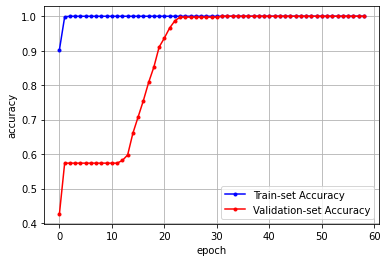

In [ ]:
plot_acc_graph(cqt_history)

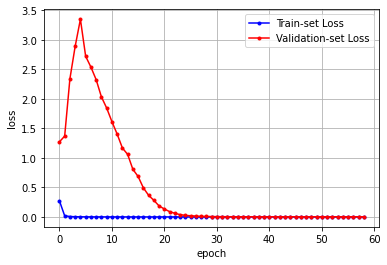

In [ ]:
plot_loss_graph(cqt_history)

In [ ]:
model_cqt.evaluate(test_data_cqt, test_inst_cat)

10/10 [==============================] - 1s 38ms/step - loss: 0.1190 - acc: 0.9467


[0.1190183162689209, 0.9466666579246521]

In [ ]:
y_pred_cqt = np.around(model_cqt.predict(test_data_cqt))

print(metrics.classification_report(test_inst_cat, y_pred_cqt, target_names=['Normal', 'Fault']))

              precision    recall  f1-score   support

      Normal       0.92      0.97      0.95       150
       Fault       0.99      0.91      0.95       150

   micro avg       0.96      0.94      0.95       300
   macro avg       0.96      0.94      0.95       300
weighted avg       0.96      0.94      0.95       300
 samples avg       0.94      0.94      0.94       300



C:\Users\CVLAB308\.conda\envs\python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pred_y_cqt = []
for i in y_pred_cqt:
    pred_y_cqt.append(np.argmax(i))
    
print(pred_y_cqt)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


C:\Users\CVLAB308\AppData\Local\Temp/ipykernel_2068/1169585728.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c_mat_cqt = c_mat_cqt / c_mat_cqt.astype(np.float).sum(axis=1)


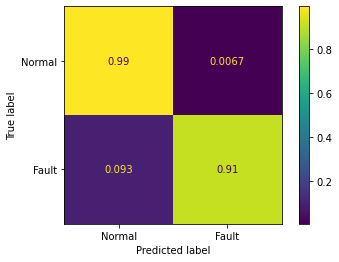

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
c_mat_cqt = confusion_matrix(test_label, pred_y_cqt)
c_mat_cqt = c_mat_cqt / c_mat_cqt.astype(np.float).sum(axis=1)
disp_cqt = ConfusionMatrixDisplay(confusion_matrix=c_mat_cqt, display_labels=['Normal', 'Fault'])
disp_cqt.plot()
plt.show()

In [ ]:
def mfcc(data, sr=16000):
    audio_mfcc = []

    for y in tqdm(data):
        ret = librosa.feature.mfcc(y=y, sr=sr)
        ret = np.abs(ret)
        ret = librosa.power_to_db(ret, ref=np.max)
        audio_mfcc.append(ret)

    mfcc_np = np.array(audio_mfcc, np.float32)
    mfcc_array = np.expand_dims(mfcc_np, -1)

    return mfcc_array

In [ ]:
train_data_mfcc = mfcc(train_data)
test_data_mfcc = mfcc(test_data)

print(train_data_mfcc.shape, test_data_mfcc.shape)

100%|██████████| 300/300 [00:02<00:00, 141.51it/s]

(3800, 20, 219, 1) (300, 20, 219, 1)


In [ ]:
train_data_mfcc_train, train_data_mfcc_val, train_label_mfcc_train, train_label_mfcc_val = train_test_split(train_data_mfcc, train_label, shuffle=True, test_size=0.1)

In [ ]:
train_mfcc_inst_cat = to_categorical(train_label_mfcc_train)

val_mfcc_inst_cat = to_categorical(train_label_mfcc_val)

_, h_mfcc, w_mfcc, c_mfcc = train_data_mfcc_train.shape

In [ ]:
model_mfcc = model_build(h_mfcc, w_mfcc, c_mfcc, Total_Class_Num=2)
model_mfcc.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 20, 219, 1)]      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 20, 219, 32)       320       
_________________________________________________________________
batch_normalization_9 (Batch (None, 20, 219, 32)       128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 20, 219, 32)       9248      
_________________________________________________________________
batch_normalization_10 (Batc (None, 20, 219, 32)       128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 110, 32)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 110, 64)       1849

In [ ]:
mfcc_history = model_mfcc.fit(train_data_mfcc_train, train_mfcc_inst_cat, epochs=300, batch_size=256, callbacks=[es, mfcc_checkpoint], validation_data=(train_data_mfcc_val, val_mfcc_inst_cat))

Epoch 1/300
14/14 [==============================] - 5s 195ms/step - loss: 0.5280 - acc: 0.7661 - val_loss: 1.8731 - val_acc: 0.5079
Epoch 2/300
14/14 [==============================] - 1s 69ms/step - loss: 0.1315 - acc: 0.9570 - val_loss: 0.6985 - val_acc: 0.5158
Epoch 3/300
14/14 [==============================] - 1s 69ms/step - loss: 0.0358 - acc: 0.9947 - val_loss: 0.7124 - val_acc: 0.5000
Epoch 4/300
14/14 [==============================] - 1s 69ms/step - loss: 0.0099 - acc: 1.0000 - val_loss: 0.6681 - val_acc: 0.6342
Epoch 5/300
14/14 [==============================] - 1s 69ms/step - loss: 0.0049 - acc: 1.0000 - val_loss: 0.7033 - val_acc: 0.5263
Epoch 6/300
14/14 [==============================] - 1s 69ms/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.6230 - val_acc: 0.6132
Epoch 7/300
14/14 [==============================] - 1s 69ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.6761 - val_acc: 0.5605
Epoch 8/300
14/14 [==============================] - 1s 69ms/step - loss: 0

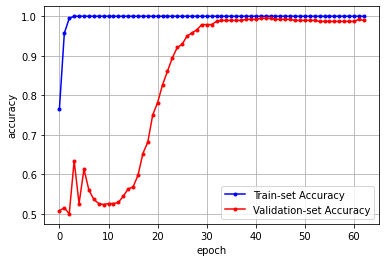

In [ ]:
plot_acc_graph(mfcc_history)

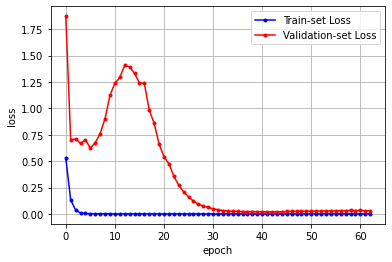

In [ ]:
plot_loss_graph(mfcc_history)

In [ ]:
model_mfcc.evaluate(test_data_mfcc, test_inst_cat)

10/10 [==============================] - 0s 21ms/step - loss: 0.9571 - acc: 0.7967


[0.957135021686554, 0.79666668176651]

In [ ]:
y_pred_mfcc = np.around(model_mfcc.predict(test_data_mfcc))

print(metrics.classification_report(test_inst_cat, y_pred_mfcc, target_names=['Normal', 'Fault']))

              precision    recall  f1-score   support

      Normal       0.72      0.97      0.83       150
       Fault       0.94      0.63      0.75       150

   micro avg       0.79      0.80      0.80       300
   macro avg       0.83      0.80      0.79       300
weighted avg       0.83      0.80      0.79       300
 samples avg       0.80      0.80      0.80       300



In [ ]:
pred_y_mfcc = []
for i in y_pred_mfcc:
    pred_y_mfcc.append(np.argmax(i))
    
print(pred_y_mfcc)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1]


C:\Users\CVLAB308\AppData\Local\Temp/ipykernel_2068/3093702039.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c_mat_mfcc = c_mat_mfcc / c_mat_mfcc.astype(np.float).sum(axis=1)


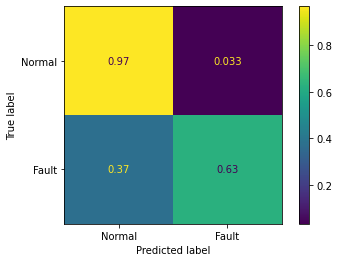

In [ ]:
c_mat_mfcc = confusion_matrix(test_label, pred_y_mfcc)
c_mat_mfcc = c_mat_mfcc / c_mat_mfcc.astype(np.float).sum(axis=1)
disp_mfcc = ConfusionMatrixDisplay(confusion_matrix=c_mat_mfcc, display_labels=['Normal', 'Fault'])
disp_mfcc.plot()
plt.show()

In [ ]:
def melspec(data, sr=16000):
    audio_melspec = []

    for y in tqdm(data):
        ret = librosa.feature.melspectrogram(y=y, sr=sr)
        ret = np.abs(ret)
        ret = librosa.power_to_db(ret, ref=np.max)
        audio_melspec.append(ret)

    melspec_np = np.array(audio_melspec, np.float32)
    melspec_array = np.expand_dims(melspec_np, -1)

    return melspec_array

In [ ]:
train_data_melspec = melspec(train_data)
test_data_melspec = melspec(test_data)

print(train_data_melspec.shape, test_data_melspec.shape)

100%|██████████| 300/300 [00:02<00:00, 148.29it/s]

(3800, 128, 219, 1) (300, 128, 219, 1)


In [ ]:
train_data_melspec_train, train_data_melspec_val, train_label_melspec_train, train_label_melspec_val = train_test_split(train_data_melspec, train_label, shuffle=True, test_size=0.1)

In [ ]:
train_melspec_inst_cat = to_categorical(train_label_melspec_train)

val_melspec_inst_cat = to_categorical(train_label_melspec_val)

_, h_melspec, w_melspec, c_melspec = train_data_melspec_train.shape

In [ ]:
model_melspec = model_build(h_melspec, w_melspec, c_melspec, Total_Class_Num=2)
model_melspec.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 219, 1)]     0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 128, 219, 32)      320       
_________________________________________________________________
batch_normalization_18 (Batc (None, 128, 219, 32)      128       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 128, 219, 32)      9248      
_________________________________________________________________
batch_normalization_19 (Batc (None, 128, 219, 32)      128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 110, 32)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 64, 110, 64)       1849

In [ ]:
melspec_history = model_melspec.fit(train_data_melspec_train, train_melspec_inst_cat, epochs=300, batch_size=256, callbacks=[es, melspec_checkpoint], validation_data=(train_data_melspec_val, val_melspec_inst_cat))

Epoch 1/300
14/14 [==============================] - 13s 638ms/step - loss: 0.3297 - acc: 0.8991 - val_loss: 2.7272 - val_acc: 0.4237
Epoch 2/300
14/14 [==============================] - 5s 333ms/step - loss: 0.0210 - acc: 0.9974 - val_loss: 1.0022 - val_acc: 0.5763
Epoch 3/300
14/14 [==============================] - 5s 333ms/step - loss: 0.0082 - acc: 0.9994 - val_loss: 1.0284 - val_acc: 0.5763
Epoch 4/300
14/14 [==============================] - 5s 333ms/step - loss: 0.0038 - acc: 0.9997 - val_loss: 2.8447 - val_acc: 0.5763
Epoch 5/300
14/14 [==============================] - 5s 332ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 3.7461 - val_acc: 0.5763
Epoch 6/300
14/14 [==============================] - 5s 333ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 3.2540 - val_acc: 0.5763
Epoch 7/300
14/14 [==============================] - 5s 333ms/step - loss: 9.5398e-04 - acc: 1.0000 - val_loss: 2.2333 - val_acc: 0.5763
Epoch 8/300
14/14 [==============================] - 5s 333ms/st

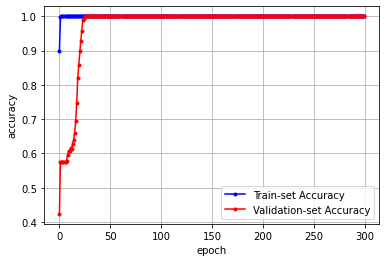

In [ ]:
plot_acc_graph(melspec_history)

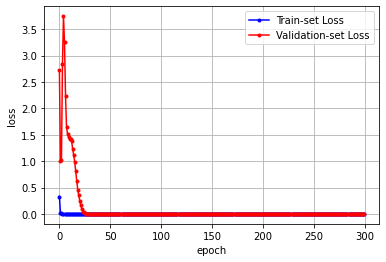

In [ ]:
plot_loss_graph(melspec_history)

In [ ]:
model_melspec.evaluate(test_data_melspec, test_inst_cat)

10/10 [==============================] - 1s 48ms/step - loss: 0.0908 - acc: 0.9600


[0.09080901741981506, 0.9599999785423279]

In [ ]:
y_pred_melspec = np.around(model_melspec.predict(test_data_melspec))

print(metrics.classification_report(test_inst_cat, y_pred_melspec, target_names=['Normal', 'Fault']))

              precision    recall  f1-score   support

      Normal       0.91      1.00      0.95       150
       Fault       1.00      0.93      0.96       150

   micro avg       0.95      0.96      0.96       300
   macro avg       0.95      0.96      0.96       300
weighted avg       0.95      0.96      0.96       300
 samples avg       0.96      0.96      0.96       300



In [ ]:
pred_y_melspec = []
for i in y_pred_melspec:
    pred_y_melspec.append(np.argmax(i))
    
print(pred_y_melspec)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]


C:\Users\CVLAB308\AppData\Local\Temp/ipykernel_2068/3062711663.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c_mat_melspec = c_mat_melspec / c_mat_melspec.astype(np.float).sum(axis=1)


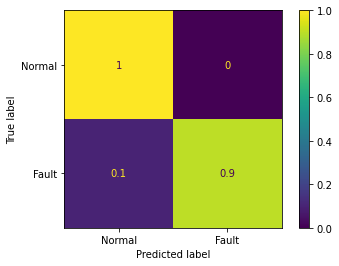

In [ ]:
c_mat_melspec = confusion_matrix(test_label, pred_y_melspec)
c_mat_melspec = c_mat_melspec / c_mat_melspec.astype(np.float).sum(axis=1)
disp_melspec = ConfusionMatrixDisplay(confusion_matrix=c_mat_melspec, display_labels=['Normal', 'Fault'])
disp_melspec.plot()
plt.show()